# Data Description:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Domain:Banking

# Context:

Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.


# Attribute Information:

1. age (numeric)

2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5. default: has credit in default? (categorical: 'no','yes','unknown')

6. balance: average yearly balance, in euros (numeric)

7. housing: has housing loan? (categorical: 'no','yes','unknown')

8. loan: has personal loan? (categorical: 'no','yes','unknown')

9. contact: contact communication type (categorical: 'cellular','telephone')

10. day: last contact day of the month (numeric 1 -31)

11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target      (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y  is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention   is to have a realistic predictive model.

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means 
    client was not previously contacted)

15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17. target: has the client subscribed a term deposit? (binary: "yes","no")

# Objective:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Steps and tasks:

1. Import the necessary libraries 

2. Read the data as a data frame 

3. Perform basic EDA which should include the following and print out your insights at every step. 

a. Shape of the data 

b. Data type of each attribute

c. Checking the presence of missing values

d. 5 Point summary of numerical attributes

e. Checking the presence of outliers 

4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. 

5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. 

7. Compare performances of all the models 

# (1) Importing the necessary libraries

In [1]:
#to perform numerical operation
import numpy as np

#to work with data frame
import pandas as pd

#importing ploting libraries
import matplotlib.pyplot as plt

# importing seaborn for statistical plots
import seaborn as sns

#Importing Sklearn package's for data splitting 
from sklearn.model_selection import train_test_split

# importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# importing performance metrices -accuracy score & confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# importing libraries of KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  

from sklearn import tree
from os import system

# (2) Read the data as a data frame 

In [2]:
#Reading the data as data frame

data_frame=pd.read_csv('bank-full.csv')

#creating copy of original data so not to make any change in original data frame
data=data_frame.copy()

#printing top 5 rows of the data frame in order to see all the attributes/features
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# (3) Perform basic EDA which should include the following and print out your insights at every step

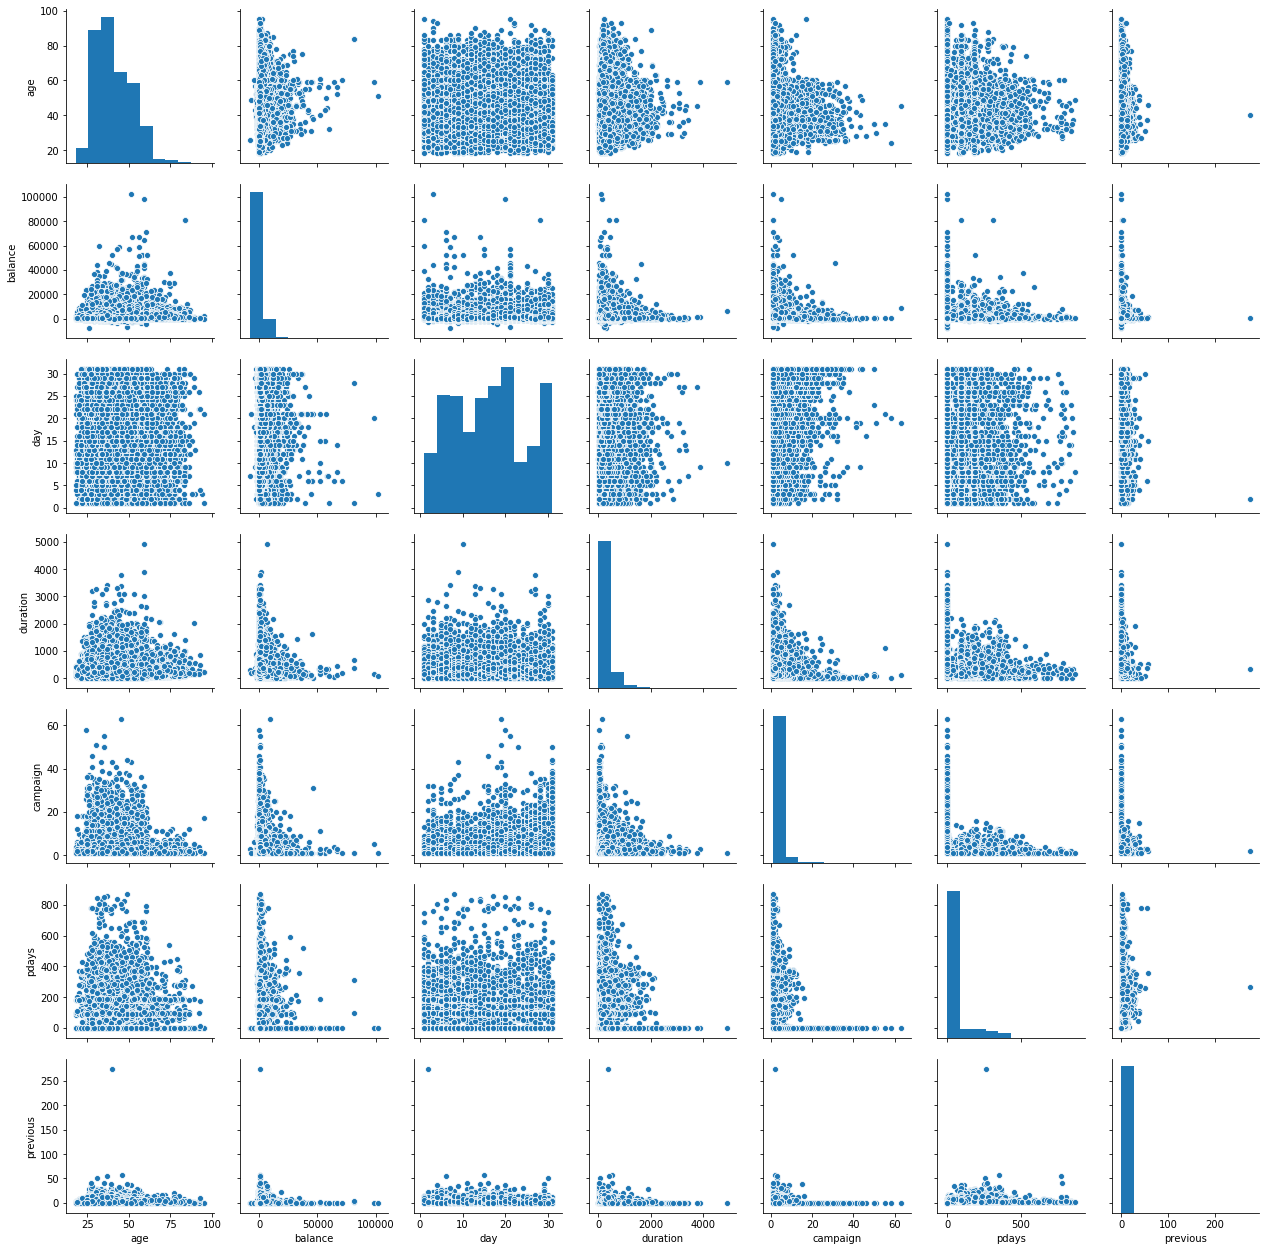

In [3]:
sns.pairplot(data)
#sns.pairplot(data,diag_kind='kde')

From the above pair plot we can observe that there is skewness present in almost all the attribute

# (3a)Shape of the data

In [4]:
data.shape

(45211, 17)

The file contain 45211 rows/data points/data object and 17 attributes out of which one column correspond to target column

# (3b)Data type of each attribute

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Out of total 17 attributes 10 attributes are object types and rest are integer types.We need to convert object type to categorical type

# (3c)Checking the presence of missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# checking any null values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


From the above we can see that there is no missing value.But if we see the below table there are many categorical attributes which have unknown values which are actually missing values.So we need to further dive deep down for handling these unknown values

In [8]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# (3d)5 Point summary of numerical attributes

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


From the above we can observe following:

(i)Some of the values of 'Balance' attributes are negative which is not at all possible and so proper care need to be taken before further analysis

(ii)As there is quite difffernce between mean and median for 'duration'attribute so there is skewness present in this

(iii)'Previous' attributes have too much outliers

(iv)'pdays'attribute have quite a large number of negative values which basically tells that quantity that client was not previously contacted is more than the client previously contacted

(v)'age'&'day' attribute have nearly no skewness as mean and median are almost same

In [10]:
#from the above we can see that "balance" attribute has negative value which may be typing error.Replacing negative values with corresponding absolute values

data['balance'] = data['balance'].abs()

# (3e)Checking the presence of outliers

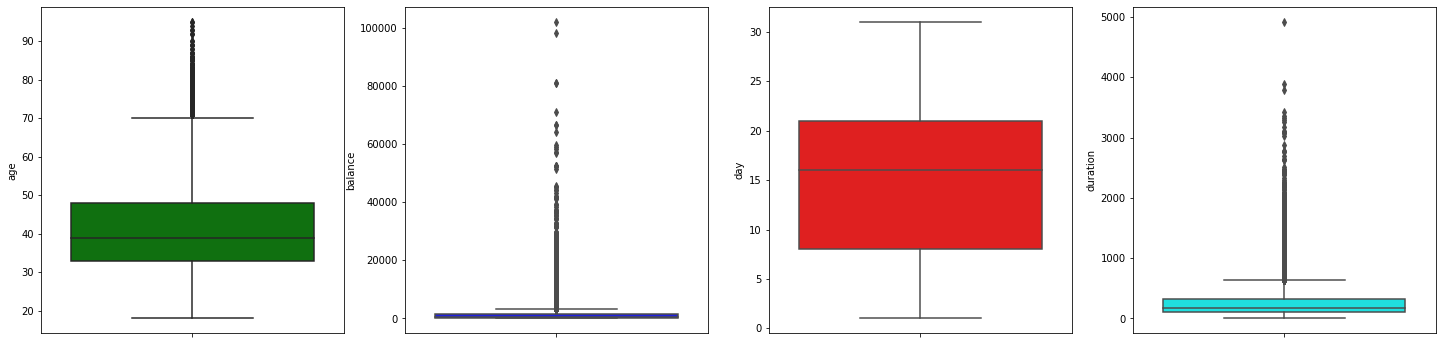

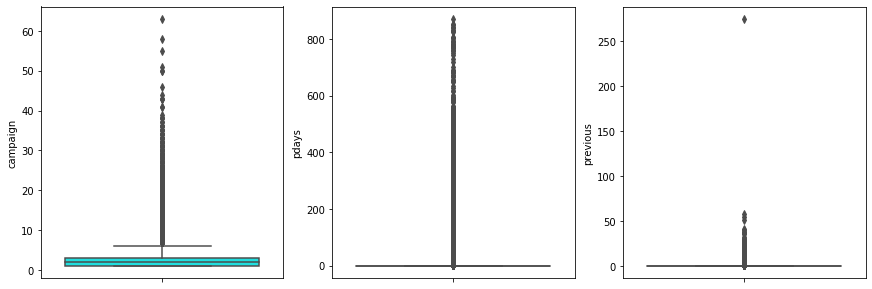

In [11]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
sns.boxplot(data['age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1,4, 2)
sns.boxplot(data['balance'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
sns.boxplot(data['day'],orient='vertical',color='red')

plt.subplot(1, 4, 4)
sns.boxplot(data['duration'],orient='vertical',color='cyan')


plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.boxplot(data['campaign'],orient='vertical',color='cyan')

plt.subplot(1,4, 2)
sns.boxplot(data['pdays'],orient='vertical',color='cyan')

plt.subplot(1, 4, 3)
sns.boxplot(data['previous'],orient='vertical',color='cyan')

plt.show()

From the above box plot we can observe:

(i) except 'day'attribute we have outliers in all the numerical attributes

(ii)Skewness is present

(iii)Other than 'day' attribute all numerical attributes are mostly right skewed

# (4) Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

In [12]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

From the above we can observe that that there are 7 attributes of integer data types and rest attributes of object types i.e string types.These need to be converted into categorical type.

In [13]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])
        
data.head()

# data.dtypes  # we can recheck that data types of attribute which was object has been changed to category

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


From the above we can observe that there are many categorical attributes in which we have unknown values/missing values.Lets further dive deep down and see what are the different values hold by these categorical attributes.

In [14]:
# Finding differnt values hold by categorical attributes

print(data.job.value_counts())  # we can also use syntax like print(data['job'].value_counts())
print(data.marital.value_counts())
print(data.education.value_counts())
print(data.default.value_counts())
print(data.housing.value_counts())
print(data.loan.value_counts())
print(data.contact.value_counts())
print(data.month.value_counts())
print(data.poutcome.value_counts())
print(data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

From the above we can see that in some of categorical attributes we can provide ordering (ordinal variable ) like education,default,month,target,loan,housing but in some cases(like job,marital,contact,poutcome) we don't know the ordering of the string and so we can apply one hot encoding in those columns

In [15]:
# Creating a structure for replacing string with number order where ordering is possible and where ordering is not possible using one hot encoding
# if we do not want ordering to be effected in ordinal variable we can provide -1 value to unknown values
# Decision tree are sensitive to ordering and so proper ordering is to be done

replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "default": {"no": 0, "yes":1 },
                "housing": {"no": 0, "yes":1 },
                "loan": {"no": 0, "yes":1 },
                "month":     {"jan": 1, "feb": 2,"mar": 3,"apr":4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec":12 },
                "Target":     {"no": 0, "yes": 1 } 
                    }

# columns where decding ordering is difficult
oneHotCols=["job","marital","contact","poutcome"]

In [16]:
#replacing data frame categorical attribute with new structure and applying one hot encoding to columns where ordering is not possible

data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)


In [17]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


We can clearly observe that number of columns increased from 17 to 35.

In [18]:
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

From the above we can observe it is data imbalance problem as number of yes(1) is very less than number of no(0)

# Splitting the data into training and test set in the ratio of 70:30 respectively

In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('Target',axis=1)     # Dropping the 'Target'column and saving in variable X
Y = data['Target']   # Predicted class (1=yes, 0=no) 

#X.head()
#Y.head()

In [20]:
# converting the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
#kNN model is sensitive to distance

from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,-3.427835e-14,4.520540e-15,-2.364546e-15,1.382298e-14,-1.275129e-14,-9.219436e-15,-2.268775e-14,5.560938e-17,1.254699e-14,...,8.782426e-15,3.787518e-15,-2.516489e-15,1.085783e-13,7.248147e-14,9.608616e-14,7.057521e-14,-5.518320e-14,-1.030514e-13,5.035903e-14
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.344586e+00,-1.354899e-01,-4.685309e-01,-1.118674e+00,-4.368035e-01,-1.779108e+00,-2.136478e+00,-1.002478e+00,-5.693506e-01,...,-3.607797e-01,-1.229691e+00,-6.280903e-01,-1.356030e+00,-2.620909e-01,-6.359724e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,-2.116316e+00
25%,-7.473845e-01,-2.153577e-02,-1.354899e-01,-4.231742e-01,-1.118674e+00,-4.368035e-01,-9.380027e-01,-4.753536e-01,-6.025167e-01,-5.693506e-01,...,-3.607797e-01,-1.229691e+00,-6.280903e-01,-1.356030e+00,-2.620909e-01,-6.359724e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
50%,-1.823406e-01,-2.153577e-02,-1.354899e-01,-3.079613e-01,8.939154e-01,-4.368035e-01,2.326031e-02,-6.007252e-02,-3.035165e-01,-2.465603e-01,...,-3.607797e-01,8.132122e-01,-6.280903e-01,7.374469e-01,-2.620909e-01,-6.359724e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
75%,6.652252e-01,1.086148e+00,-1.354899e-01,6.887583e-03,8.939154e-01,-4.368035e-01,6.240497e-01,7.704897e-01,2.362370e-01,7.622994e-02,...,-3.607797e-01,8.132122e-01,1.592128e+00,7.374469e-01,-2.620909e-01,1.572395e+00,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
max,5.091402e+00,1.086148e+00,7.380625e+00,3.334280e+01,8.939154e-01,2.289359e+00,1.825628e+00,2.431614e+00,1.809470e+01,1.944365e+01,...,2.771775e+00,8.132122e-01,1.592128e+00,7.374469e-01,3.815470e+00,1.572395e+00,2.867900e+00,4.855018e+00,5.377848e+00,4.725192e-01


In [21]:
#splitting the data into 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

# (5)Train a few standard classification algorithms, note and comment on their performances across different classification metrics

# (i) Logistic regression classifier 

In [22]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(x_train, y_train)
#predict on test
y_pred_logistic = model_logistic.predict(x_test)


In [23]:
model_score_logistic = model_logistic.score(x_test, y_test)
print(model_score_logistic)

0.9008404600412857


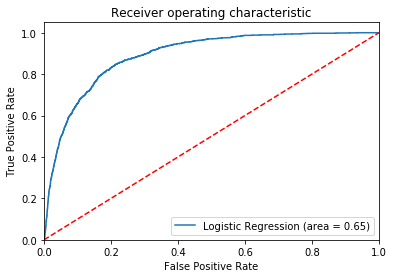

In [24]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under ROC curve is measure of how good the model is in terms of distinguishing between two classes.Higher the AUC model is better at predicting 0s as 0s and 1s as 1s

As area under curve (AUC) is in the range of 0.5<AUC<1 there is a reasonable separation between two classes

Confusion Matrix for Logistic classification model


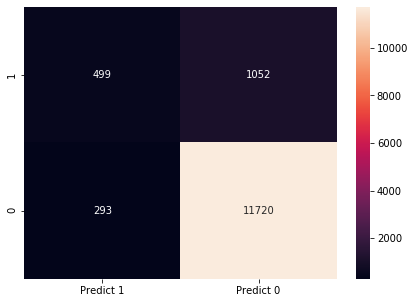

In [25]:
print("Confusion Matrix for Logistic classification model")
cm_logistic=metrics.confusion_matrix(y_test, y_pred_logistic, labels=[1, 0])

df_cm_logistic = pd.DataFrame(cm_logistic, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_logistic, annot=True,fmt='g')   # fmt='g' shows exact values in confusion matrix


From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 499

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11720

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 293 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 1052 

# (ii) k-NN classifier

In [26]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
model_knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
model_knn.fit(x_train, y_train)

# predict the response
y_pred_knn = model_knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_knn))


0.8913299911530522


Confusion Matrix for kNN model


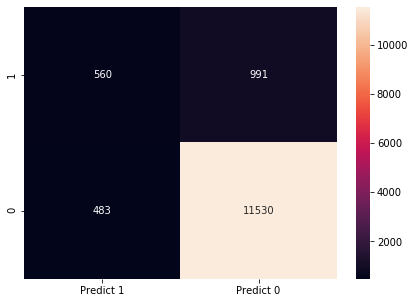

In [27]:
print("Confusion Matrix for kNN model")
cm_knn=metrics.confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True,fmt='g')

From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 560

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11530

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 483 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 991 

# (iii) Naive Bayes classifier

In [28]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model_NB = GaussianNB()

model_NB.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
#Performance of our model with training data
ytrain_predict = model_NB.predict(x_train)

from sklearn import metrics

print("Model Train Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, ytrain_predict)))
print()

Model Train Accuracy: 0.8162



In [30]:
#Performance of our model with testing data
y_pred_NB = model_NB.predict(x_test)

from sklearn import metrics

print("Model Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred_NB)))
print()

Model Test Accuracy: 0.8166



Confusion Matrix for Naive Bayes


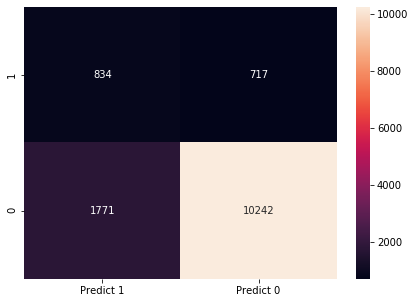

In [31]:
print("Confusion Matrix for Naive Bayes")
cm_NB=metrics.confusion_matrix(y_test, y_pred_NB, labels=[1, 0])

df_cm_NB = pd.DataFrame(cm_NB, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_NB, annot=True,fmt='g')

From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 834

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 10242

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 1771 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 717 

# (iv) Decision tree classifier

In [32]:
model_dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model_dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [33]:
print(model_dTree.score(x_train, y_train))
print(model_dTree.score(x_test, y_test))

1.0
0.8737098201120613


There is a high degree of overfitting in the model due to which the test accuracy drops drastically

# Reducing over fitting (Regularization)

In [34]:
model_dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
model_dTreeR.fit(x_train, y_train)
print(model_dTreeR.score(x_train, y_train))
print(model_dTreeR.score(x_test, y_test))

0.9005276961481341
0.9019463285166618



 When the tree is regularaised, overfitting is reduced and there is also increase in accuracy

In [35]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model_dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                        Imp
age                0.051436
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
day                0.000000
month              0.000000
duration           0.606017
campaign           0.000000
pdays              0.000000
previous           0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.000000
contact_cellular   0.005901
contact_telephone  0.000000
contact_unknown    0.000000
poutcome_failure   0.000000
poutcome_other     0.000000
poutcome_success   0.336646
poutcome_unknown   0.000000


From the above we can observe that 'duration' and 'poutcome_success' are the important features

0.9019463285166618
Confusion Matrix for Decision Tree


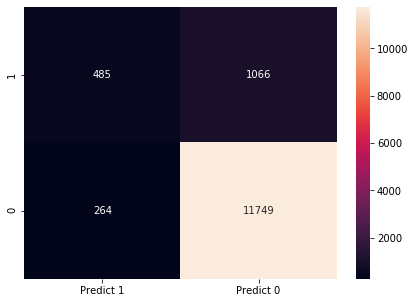

In [36]:
print(model_dTreeR.score(x_test , y_test))
print("Confusion Matrix for Decision Tree")
y_pred_dTreeR = model_dTreeR.predict(x_test)

cm_dTreeR=metrics.confusion_matrix(y_test, y_pred_dTreeR, labels=[1, 0])

df_cm_dTreeR = pd.DataFrame(cm_dTreeR, index = [i for i in ["1","0"]],   # for actual
                  columns = [i for i in ["Predict 1","Predict 0"]])   # for predict
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_dTreeR, annot=True ,fmt='g')


From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 485

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11749

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 264 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 1066 


# obs:
Among Logistic,kNN,Naive Bayes and Decision Tree model ,Accuracy of Decision Tree is greatest.Let us see when ensemble method are applied than what is the effect

# (6)Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees

# (i)Ensemble model-Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier

model_bgcl = BaggingClassifier(base_estimator=model_dTree, n_estimators=50,random_state=1)
#here in case of bagging we use base estimator model_dTree as eventhough overfitting happen in split but when taken average then model do not overfit
#model_bgcl = BaggingClassifier(n_estimators=50,random_state=1)

model_bgcl = model_bgcl.fit(x_train, y_train)

0.9062223532881156
Confusion Matrix for Ensemble-Bagging


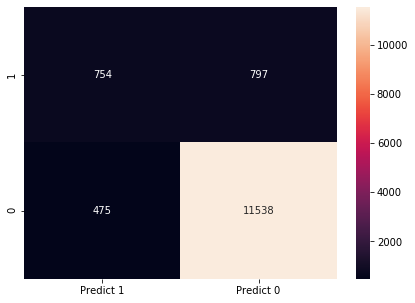

In [38]:
y_pred_bgcl = model_bgcl.predict(x_test)

print(model_bgcl.score(x_test , y_test))
print("Confusion Matrix for Ensemble-Bagging")
cm_bgcl=metrics.confusion_matrix(y_test, y_pred_bgcl,labels=[1, 0])

df_cm_bgcl = pd.DataFrame(cm_bgcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_bgcl, annot=True ,fmt='g')


From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 754

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11538

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 475 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 797 

# (ii)Ensemble model-AdaBoosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
model_abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#model_abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
model_abcl = model_abcl.fit(x_train, y_train)

0.8983338248304334
Confusion Matrix for Ensemble-AdaBoosting


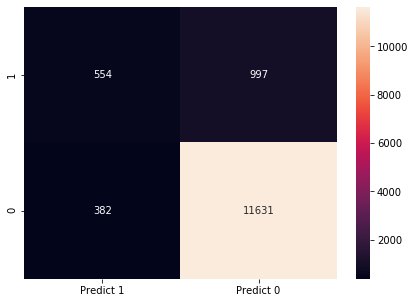

In [40]:
y_pred_abcl = model_abcl.predict(x_test)
print(model_abcl.score(x_test , y_test))

print("Confusion Matrix for Ensemble-AdaBoosting")
cm_abcl=metrics.confusion_matrix(y_test, y_pred_abcl,labels=[1, 0])

df_cm_abcl = pd.DataFrame(cm_abcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_abcl, annot=True ,fmt='g')


From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 554

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11631

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 382 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 997 

# (iii)Ensemble model-GradientBoost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model_gbcl = model_gbcl.fit(x_train, y_train)


0.9035682689472132


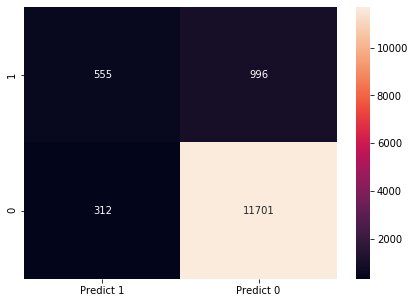

In [42]:
y_pred_gbcl = model_gbcl.predict(x_test)
print(model_gbcl.score(x_test, y_test))
cm_gbcl=metrics.confusion_matrix(y_test, y_pred_gbcl,labels=[1, 0])

df_cm_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gbcl, annot=True ,fmt='g')

From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 555

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11701

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 312 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 996 


# (iv)Ensemble model-Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
model_rfcl = model_rfcl.fit(x_train, y_train)

0.9046741374225892


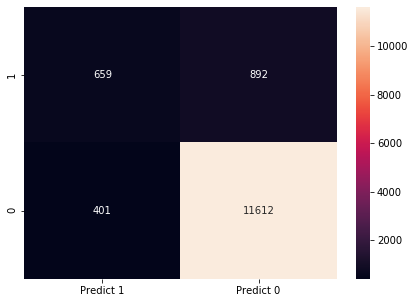

In [44]:
y_pred_rfcl = model_rfcl.predict(x_test)
print(model_rfcl.score(x_test, y_test))
cm_rfcl=metrics.confusion_matrix(y_test, y_pred_rfcl,labels=[1, 0])

df_cm_rfcl = pd.DataFrame(cm_rfcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rfcl, annot=True ,fmt='g')

From the above confusion matrix

True Positives (TP): Number of times we correctly predicted that client subscribed a term deposit 659

True Negatives (TN): Number of times we correctly predicted that client don't subscribed a term deposit 11612

False Positives (FP): Number of times we incorrectly predicted that client have subscribed a term deposit (a "Type I error") 401 

False Negatives (FN): Number of times we incorrectly predicted that client don't subscribed a term deposit (a "Type II error") 892 


# observation:

(i)Accuracy of Ensemble-Bagging is great than base model and other ensemble models.

(ii)Accuracy of Adaboost is little less than base model

(iii)Most number of 1's correctly predicted in case of Bagging

# (7) Compare performances of all the models

In [45]:
print("Classification Report of Logistic Model")
print(metrics.classification_report(y_test, y_pred_logistic, labels=[1, 0]))

Classification Report of Logistic Model
              precision    recall  f1-score   support

           1       0.63      0.32      0.43      1551
           0       0.92      0.98      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [46]:
print("Classification Report of kNN Model")
print(metrics.classification_report(y_test, y_pred_knn, labels=[1, 0]))

Classification Report of kNN Model
              precision    recall  f1-score   support

           1       0.54      0.36      0.43      1551
           0       0.92      0.96      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.73      0.66      0.69     13564
weighted avg       0.88      0.89      0.88     13564



In [47]:
print("Classification Report of Naive Bayes Model")
print(metrics.classification_report(y_test, y_pred_NB, labels=[1, 0]))

Classification Report of Naive Bayes Model
              precision    recall  f1-score   support

           1       0.32      0.54      0.40      1551
           0       0.93      0.85      0.89     12013

    accuracy                           0.82     13564
   macro avg       0.63      0.70      0.65     13564
weighted avg       0.86      0.82      0.84     13564



In [48]:
print("Classification Report of Decision Tree Regularized classifier")
print(metrics.classification_report(y_test, y_pred_dTreeR, labels=[1, 0]))

Classification Report of Decision Tree Regularized classifier
              precision    recall  f1-score   support

           1       0.65      0.31      0.42      1551
           0       0.92      0.98      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.68     13564
weighted avg       0.89      0.90      0.89     13564



In [49]:
print("Classification Report of Ensemble-Bagging")
print(metrics.classification_report(y_test, y_pred_bgcl, labels=[1, 0]))

Classification Report of Ensemble-Bagging
              precision    recall  f1-score   support

           1       0.61      0.49      0.54      1551
           0       0.94      0.96      0.95     12013

    accuracy                           0.91     13564
   macro avg       0.77      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



In [50]:
print("Classification Report of Ensemble-Adaboost classifier")
print(metrics.classification_report(y_test, y_pred_abcl, labels=[1, 0]))

Classification Report of Ensemble-Adaboost classifier
              precision    recall  f1-score   support

           1       0.59      0.36      0.45      1551
           0       0.92      0.97      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [51]:
print("Classification Report of Ensemble-Gradient Boost")
print(metrics.classification_report(y_test, y_pred_gbcl, labels=[1, 0]))

Classification Report of Ensemble-Gradient Boost
              precision    recall  f1-score   support

           1       0.64      0.36      0.46      1551
           0       0.92      0.97      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [52]:
print("Classification Report of Ensemble-Random Forest")
print(metrics.classification_report(y_test, y_pred_rfcl, labels=[1, 0]))

Classification Report of Ensemble-Random Forest
              precision    recall  f1-score   support

           1       0.62      0.42      0.50      1551
           0       0.93      0.97      0.95     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564



As per the definitions:

(i) Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.
Accuracy= (True Positive + True Negative) / Total Population

(ii)Precision: When a positive value is predicted, how often is the prediction correct.It’s a score of how likely a positive prediction is to be correct.Precision= TP/(TP + FP)

(iii)Recall: When the actual value is positive, how often is the prediction correct.It’s is a score of how many true positives were successfully predicted(that is, recalled).Recall=TP/(TP+FN)

(iv)F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.

F1-Score: (2 x Precision x Recall) / (Precision + Recall)

(v) Simply put, precision is a measure of the predictions the algorithm got right, and recall is a measure of the right things the algorithm identified in the final set.If the precision is higher than the recall, the model is better at successfully identifying correct items than not identifying some wrong items, and vice versa.


# Observations:

(i)As this data set is class imbalance problem problem so need to compare other parameters like precision, recall,F1 score apart from accuracy.

(ii)By comparing Accuracy and F1 score for the all the models from the above table it has been observed that "Ensemble-Bagging" beter classify the data then in comparison to other models.

(iii)It can be observed that precision>Recall for all the models except Naive Bayes in classifying '1' i.e 'yes'



